Working on the g140m data for Barnard's star, with an eye to developing a general script.

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from scipy.interpolate import interpolate
from craftroom import resample
#import stistools

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [3]:
path = '/home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/'

In [5]:
x1ds = glob.glob(path+'*x1d.fits')

In [8]:
g140m_x1ds = []
for x in x1ds:
    if fits.getheader(x,0)['OPT_ELEM'] =='G140M':
        g140m_x1ds.append(x)
g140m_x1ds

['/home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/odlm24030_x1d.fits',
 '/home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/odlm24040_x1d.fits',
 '/home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/odlm24050_x1d.fits']

odlm24030 2019-03-04
odlm24040 2019-03-04
odlm24050 2019-03-04


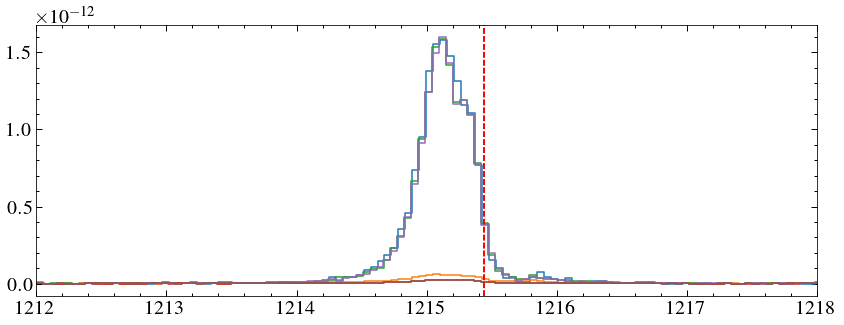

In [16]:
for x in g140m_x1ds:
    data = fits.getdata(x,1)[0]
    rootname = fits.getheader(x, 0)['ROOTNAME'] 
    date = fits.getheader(x, 0)['TDATEOBS']
    
   # if date in dates[0:3]:
    print(rootname,date)
    plt.step(data['WAVELENGTH'], data['FLUX'], where='mid')
    plt.step(data['WAVELENGTH'], data['ERROR'], where='mid')
    #plt.plot(data['WAVELENGTH'], data['FLUX'])
    #plt.plot(data['WAVELENGTH'], data['ERROR'])
    
   # plt.plot(lw, lf)
    plt.xlim(1212, 1218)

  #  plt.ylim(-1e-15, 1.4e-14)
   # plt.axhline(0, c='k', ls ='--')
    plt.axvline(1215.44, ls ='--', c='r')
    #plt.show()

Lya lines are the same, what about Nv?

odlm24030 2019-03-04
odlm24040 2019-03-04
odlm24050 2019-03-04


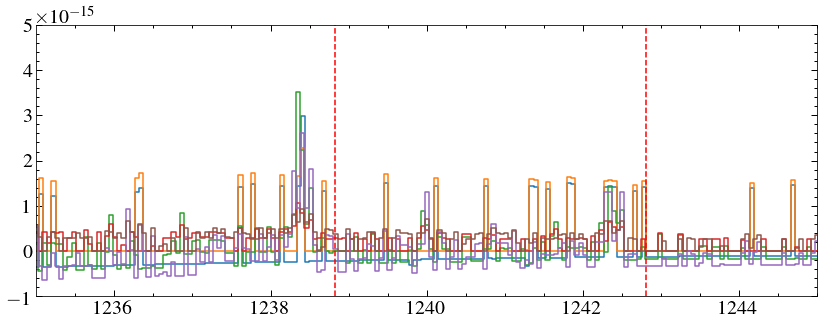

In [25]:
lines = [1238.821,1242.804]
for x in g140m_x1ds:
    data = fits.getdata(x,1)[0]
    rootname = fits.getheader(x, 0)['ROOTNAME'] 
    date = fits.getheader(x, 0)['TDATEOBS']
    
    print(rootname,date)
    plt.step(data['WAVELENGTH'], data['FLUX'], where='mid')
    plt.step(data['WAVELENGTH'], data['ERROR'], where='mid')
    #plt.plot(data['WAVELENGTH'], data['FLUX'])
    #plt.plot(data['WAVELENGTH'], data['ERROR'])
    
plt.xlim(1235, 1245)
plt.ylim(-1e-15, 0.5e-14)
[plt.axvline(line, c='r', ls='--') for line in lines]

In [81]:
def new_coadd(f_array, e_array):
    weights = 1 / (e_array**2)
    flux = np.average(f_array, axis =0, weights = weights)
    var = 1 / np.sum(weights, axis=0)
    rcs = np.sum((((flux - f_array)**2) * weights), axis=0) / (len(f_array)-1)
    error = (var * rcs)**0.5
    return flux, var**0.5, error, rcs

1024
1024
1024
1024


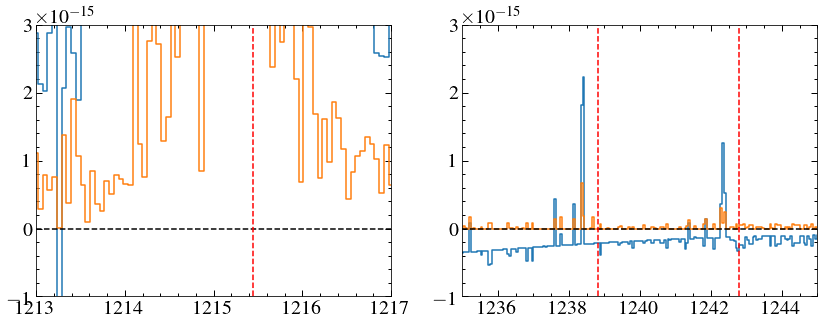

In [87]:
f_new = []
e_new = []
i = 0
for x in g140m_x1ds:
    data = fits.getdata(x,1)[0]
    if i == 0:
        w_new = data['WAVELENGTH']
       # w_new = np.arange(w_new[5], w_new[-6], np.mean(np.diff(w_new)))
        f_new.append(data['FLUX'])
        e_new.append(data['ERROR'])
        #print(len(w_new))
    else:
        fi = interpolate.interp1d(data['WAVELENGTH'], data['FLUX'], fill_value='extrapolate')(w_new)
      #  wi, fi, ei = resample.bintogrid(data['WAVELENGTH'], data['FLUX'], unc=data['ERROR'], newx = w_new, drop_nans=False)
        f_new.append(fi)
        ei = interpolate.interp1d(data['WAVELENGTH'], data['ERROR'], fill_value='extrapolate')(w_new)
        e_new.append(ei)
        print(len(fi))
        print(len(ei))
    i += 1

f_new, v_new, e_new, rcs = new_coadd(np.array(f_new), np.array(e_new))

plt.subplot(121)
plt.step(w_new, f_new, where='mid')
plt.step(w_new,e_new, where='mid')
#plt.step(w_new, v_new, where='mid')
#plt.errorbar(w_new, f_new, yerr=e_new)
#plt.plot(lw, lf)
plt.xlim(1212, 1218)

#plt.ylim(-1e-15, 1.4e-14)
plt.ylim(-1e-15, 0.3e-14)
plt.axhline(0, c='k', ls ='--')
plt.axvline(1215.44, ls ='--', c='r')

plt.subplot(122)
plt.step(w_new, f_new, where='mid')
plt.step(w_new,e_new, where='mid')
#plt.step(w_new, v_new, where='mid')
#plt.errorbar(w_new, f_new, yerr=e_new)
#plt.plot(lw, lf)

#plt.ylim(-1e-15, 1.4e-14)
plt.axhline(0, c='k', ls ='--')
plt.xlim(1235, 1245)
plt.ylim(-1e-15, 0.3e-14)
[plt.axvline(line, c='r', ls='--') for line in lines]

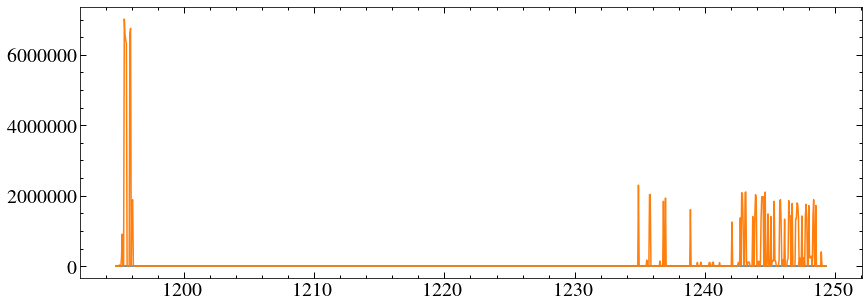

In [74]:
plt.plot(w_new, e_new)
#plt.plot(w_new, v_new**0.5)
plt.plot(w_new, rcs)


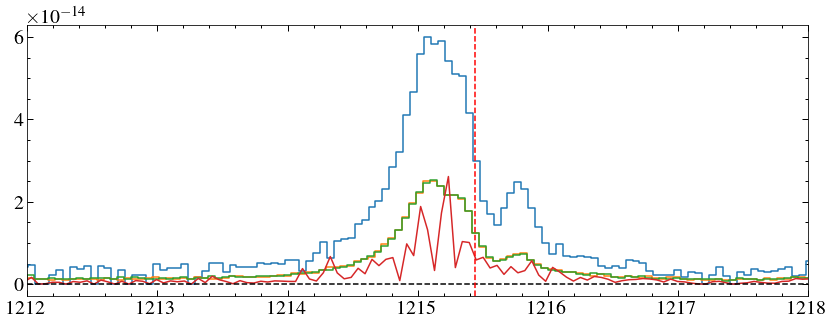

In [76]:
for x in g140m_x1ds:
    data = fits.getdata(x,1)[0]
   # plt.step(data['WAVELENGTH'], data['FLUX'], where='mid')
    plt.step(data['WAVELENGTH'], data['ERROR'], where='mid')
    #plt.plot(data['WAVELENGTH'], data['FLUX'])
    #plt.plot(data['WAVELENGTH'], data['ERROR'])
   
plt.plot(w_new, e_new)

plt.xlim(1212, 1218)
plt.axhline(0, c='k', ls ='--')
plt.axvline(1215.44, ls ='--', c='r')

Error is somewhat bigger on odlm24030- was that recalibrated? No- half the time

In [67]:
es = []
for x in g140m_x1ds:
    if i == 0:
        w_new = data['WAVELENGTH']
       # w_new = np.arange(w_new[5], w_new[-6], np.mean(np.diff(w_new)))
        f_new.append(data['FLUX'])
        e_new.append(data['ERROR'])
        #print(len(w_new))
    else:
        fi = interpolate.interp1d(data['WAVELENGTH'], data['FLUX'], fill_value='extrapolate')(w_new)
        f_new.append(fi)
        ei = interpolate.interp1d(data['WAVELENGTH'], data['ERROR'], fill_value='extrapolate')(w_new)
        e_new.append(ei)
    i += 

['/home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/odlm24030_x1d.fits',
 '/home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/odlm24040_x1d.fits',
 '/home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/odlm24050_x1d.fits']